In [1]:
from os.path import expanduser

source_node_path = expanduser('~/Projects/networker/data/max_100.csv')
# source_network_path
target_network_folder = '/tmp/networker'

In [2]:
cfg = {
    'demand_nodes': {
        'filename': source_node_path,
        'x_column': 'X',
        'y_column': 'Y', 
        'budget_column': 'mvmax',
    },
    'network_algorithm': 'mod_boruvka',
    'network_parameters': {
        'minimum_node_count': 2,
    }
}

In [3]:
from networker.networker_runner import NetworkerRunner
nwk = NetworkerRunner(cfg, target_network_folder)
nwk.validate()
nwk.run()

2016-04-05 15:41:09,596 - networker - INFO - building network
2016-04-05 15:41:09,597 - networker - INFO - running mod_boruvka on 100 demand nodes and 100 total nodes
2016-04-05 15:41:09,998 - networker - INFO - filtered result has 99 nodes and 98 edges
2016-04-05 15:41:09,999 - networker - INFO - writing output


Couldn't import dot_parser, loading of dot files will not be possible.


In [11]:
ls $target_folder

check-locals.ipynb
estimate-diesel-mini-grid-cost.ipynb
estimate-diesel-mini-grid-fuel-cost.ipynb
estimate-electricity-grid-internal-system-nodal-levelized-cost.ipynb
estimate-low-voltage-transformer-system-capacity.ipynb
estimate-network-cost.ipynb
estimate-pre-network-grid-cost.ipynb
estimate-pre-network-technology-cost.ipynb
np-cost-grid.py
sift-common-values.ipynb


In [4]:
from os.path import join
from sequencer import NetworkPlan
from sequencer.Models import EnergyMaximizeReturn

source_folder = expanduser('~/Projects/sequencer/data/sumaila/input')
csv = join(source_folder, 'metrics-local.csv')
# shp = join(target_network_folder, 'edges.shp')
shp = join(source_folder, 'networks-proposed.shp')
nwp = NetworkPlan(shp, csv, prioritize='Population')
model = EnergyMaximizeReturn(nwp)
results = model.sequence()

2016-04-05 15:41:18,847 - sequencer - INFO - Asserting Input Projections Match
2016-04-05 15:41:18,894 - sequencer - INFO - Aligning Network Nodes With Input Metrics
/home/rhh/Projects/sequencer/sequencer/Utils.py:52: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  metrics = pd.merge(metrics, node_df, on='m_coords', left_index=True).sort()
/home/rhh/Projects/sequencer/sequencer/Utils.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fake_nodes['m_coords'] = fake_nodes['m_coords'].apply(lambda x: ())
/home/rhh/Projects/sequencer/sequencer/Utils.py:64: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  metrics = pd.concat([closest_match, fake_nodes]).sort()
2016-04-05 15:41:19,117 - sequencer - INFO - Computing Pairwise Distances
2


[                                       1.35%                                       ]
[##                                     4.05%                                       ]
[##                                     5.41%                                       ]
[####                                   6.76%                                       ]
[######                                 8.56%                                       ]
[######                                 9.91%                                       ]
[######                                 10.81%                                       ]
[##############                         18.47%                                       ]
[##############                         19.82%                                       ]
[##############                         20.72%                                       ]
[################                       21.62%                                       ]
[################                       22.52%  

2016-04-05 15:41:19,654 - sequencer - INFO - Joining Sequencer Results on Input Metrics
/home/rhh/Projects/sequencer/sequencer/Sequencer.py:299: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  cols_to_join_on = (sequenced_metrics.columns - orig.columns).tolist() + ['m_coords']
2016-04-05 15:41:19,755 - sequencer - INFO - DONE!


In [5]:
from invisibleroads_macros.disk import make_folder

target_sequence_folder = make_folder('/tmp/sequencer')
model.output(target_folder)

NameError: name 'target_folder' is not defined

In [3]:
from os.path import expanduser

geometry1_path = expanduser('~/Projects/sequencer/data/sumaila/input/networks-proposed.shp')
geometry2_path = '/tmp/networker/edges.shp'
geometry3_path = '/tmp/networker/nodes.shp'

In [4]:
from geometryIO import load
a, b, c, d = load(geometry1_path)
print a
print b[:2]
print c[:2]
print d

+proj=longlat +datum=WGS84 +no_defs 
[<shapely.geometry.linestring.LineString object at 0x7f75a654e990>, <shapely.geometry.linestring.LineString object at 0x7f75a654ea90>]
[(0,), (1,)]
[('FID', 12)]


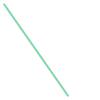

In [5]:
b[0]

In [6]:
from geometryIO import load
a, b, c, d = load(geometry2_path)
print a
print b[:2]
print c[:2]
print d

GeometryError: Could not load edges.shp

In [32]:
from geometryIO import load
a, b, c, d = load(geometry3_path)
print a
print b[:2]
print c[:2]
print d

+proj=longlat +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +no_defs 
[<shapely.geometry.point.Point object at 0x7f5ec7cf7890>, <shapely.geometry.point.Point object at 0x7f5ec7cf7a10>]
[(0,), (1,)]
[('FID', 12)]
